# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False) #mnist 손글씨 데이터를 불러옵니다
X = mnist['data']
y = mnist['target']

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 432x288 with 0 Axes>

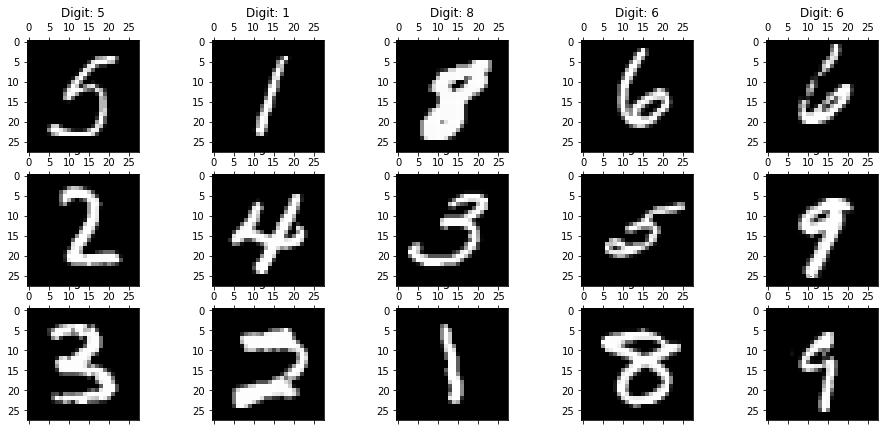

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)     

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [11]:
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [18]:
pca = PCA(n_components = 50)
xx = pca.fit(X_train)

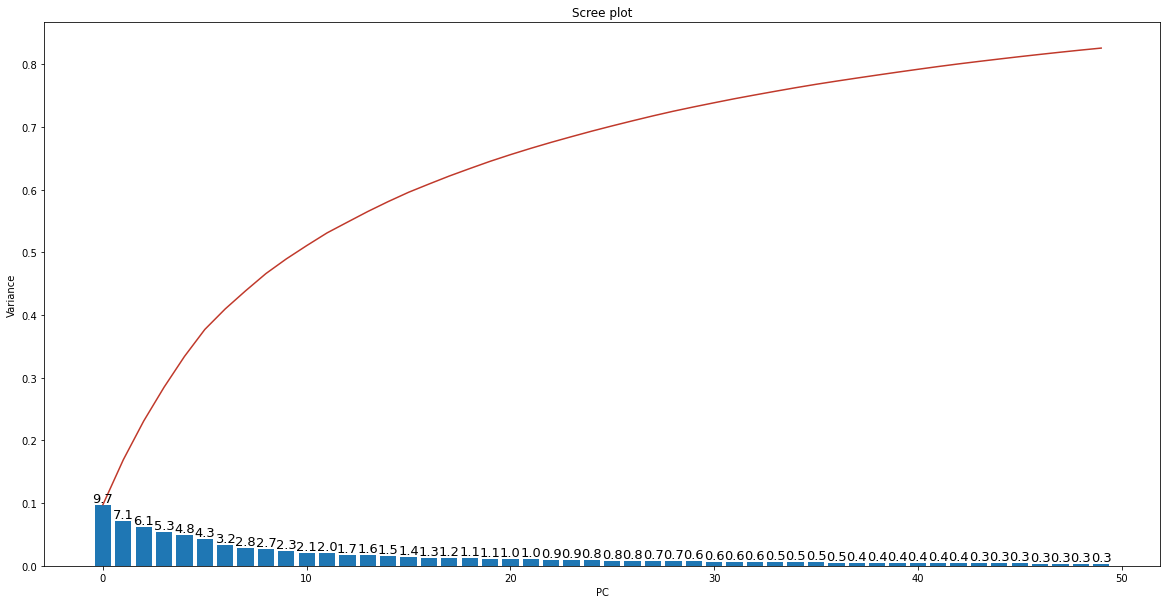

In [21]:
def scree_plot(pca):
    plt.figure(figsize=(20,10))
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(xx)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
xx = clf.fit(X_train,y_train)

In [23]:
clf.explained_variance_ratio_ 

array([0.23801142, 0.20214164, 0.17770134, 0.10681218, 0.09457475,
       0.06940949, 0.0497301 , 0.03443888, 0.02718019])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [24]:
from sklearn.ensemble import *
from sklearn.metrics import *
import time

In [26]:
m1 = RandomForestClassifier(random_state=42)
m2 = AdaBoostClassifier(random_state=42)

1. raw data

In [27]:
## randomforest
start = time.time()  
m1.fit(X_train,y_train)
y_pred = m1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
end = time.time() 
print("rf training 시간 :", end - start)
print("acc              :", acc)

rf training 시간 : 34.70779204368591
acc              : 0.9672857142857143


In [ ]:
## AdaBoostClassifier
start = time.time()  
m2.fit(X_train,y_train)
y_pred = m2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
end = time.time() 

In [29]:
print("ad training 시간 :", end - start)
print("acc              :", acc)

ad training 시간 : 60.0103554725647
acc              : 0.7165


2. pca data

In [32]:
pca = PCA(0.9) # 90 %
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

In [35]:
## randomforest
start = time.time()  
m1.fit(X_train_pca,y_train)
y_pred = m1.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
end = time.time() 
print("rf training 시간 pca :", end - start)
print("acc              pca :", acc)

rf training 시간 pca : 72.95985198020935
acc              pca : 0.9517857142857142


In [36]:
## AdaBoostClassifier
start = time.time()  
m2.fit(X_train_pca,y_train)
y_pred = m2.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
end = time.time() 
print("ad training 시간 pca :", end - start)
print("acc              pca :", acc)

ad training 시간 pca : 42.567381620407104
acc              pca : 0.7103571428571429


3. lda

In [37]:
lda = LinearDiscriminantAnalysis(n_components = 6)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)  

In [38]:
## randomforest
start = time.time()  
m1.fit(X_train_lda,y_train)
y_pred = m1.predict(X_test_lda)
acc = accuracy_score(y_test, y_pred)
end = time.time() 
print("rf training 시간 pca :", end - start)
print("acc              pca :", acc)

rf training 시간 pca : 17.073243141174316
acc              pca : 0.8658571428571429


In [39]:
## AdaBoostClassifier
start = time.time()  
m2.fit(X_train_lda,y_train)
y_pred = m2.predict(X_test_lda)
acc = accuracy_score(y_test, y_pred)
end = time.time() 
print("ad training 시간 pca :", end - start)
print("acc              pca :", acc)

ad training 시간 pca : 6.511113166809082
acc              pca : 0.7810714285714285


특정한 틀 없이 자유롭게 해주시면 됩니다!